# Capstone Project 2 - Milestone Report

## Title: Yelp business insights and hybrid restaurant recommender system

## Abstract


## 1. Introduction

### 1.1 Problem

<p>Nowadays recommender systems are everywhere. Almost every major tech company has applied them in some form or another: Amazon uses it to suggest products to customers, and YouTube uses it to decide which video to play next on autoplay. In fact, one fundamental driver of data science’s skyrocketing popularity is the overwhelming amount of information available for anyone trying to make a good decision, and a recommender system helps to filter vast amount of information and make suggestions according to individual’s preference.</p> 

<p>Yelp is one of those companies whose business success relies heavily on the power of its recommender system. It provides users coming to their website or app with quick suggestions of nearby businesses or a list of suggestions for businesses matching users’ search keywords and location. While yelp provides ratings for each business, these are not always indicative of a restaurant’s quality. For instance, a restaurant with only one rating of 5-stars would be ranked higher than a restaurant with a hundred ratings averaging 4.8 stars. Other problems include that the star rating varies from person to person, and the older ratings are less relevant. Improvements are needed to provide better ratings and suggestions.</p>

<p>In this project, a hybrid recommender system will be developed featuring following capabilities: 1) for new or anonymous users, the recommendation engine can provide base-case recommendations using location information and/or other keywords. 2) with user ID as input and user’s interactive feedback, either the collaborative filtering or the content-based filtering will be used to provide personalized recommendations from user’s activity history. 3) smart weighted ratings will be computed taking into consideration the total number of ratings and the irrelevance of outdated ratings etc.</p>

### 1.2 Approach

**Data wrangling:**<br> 
first import from json into Pandas dataframe and unpack nested dictionaries if present, followed by the necessary cleanup.<br> 

**EDA:** <br> 
Understand business and user patterns: for instance, popular restaurant cuisines by locations, popular restaurant styles by location, highly rated restaurants by cost, correlation between ratings and reviews, etc. These understanding will also help in designing the recommendation engine. <br>

**Interactive data visualizations:**<br>
Interactive data visualizations are created using bokeh based on EDA findings.<br>

**Recommender system:**<br>
* Module 1 - simple recommender:<br>
build keyword search-based restaurant recommender module to filter by keyword. Keywords could include, for instance, location-based information (zip code, longitude, latitude)  and restaurant feature-based information (cuisine). 
The restaurant inventory will be filtered by keywords first, then ranked by its average rating or weighted smart rating taking into consideration the popularity (depending on user’s choice). The top-k restaurants from the list will be returned as the top-k recommendations.<br>
* Module 2 - content filtering recommender:<br>
With user ID and restaurant’s metadata, build a content based filtering recommender module that recommends restaurants that are similar to user’s preference inferred from user’s past ratings. More specifically, pairwise similarity scores will be computed for restaurants based on their vectorized feature representation extracted using CountVectorizer or TfidfVectorizer and recommend restaurants based on rankings of the weighted similarity score (e.g. cosine similarity). The important restaurant metadata to consider include categories, attributes, location.<br>
* Module 3 - collaborative filtering recommender:<br>
With user x restaurant rating matrix, build a collaborative filtering recommender module. Remember that the dataset has a total of 1,518,169 users, 188,593 businesses, 5,996,996 reviews and 1,185,348 tip. In terms of the user x business matrix, the matrix is very sparse (0.003% non-empty). Therefore, matrix factorization using ALS (alternative least square) will be used to complete the matrix and generate recommendations.<br>
* Metrics chosen for evaluating and optimizing the ‘goodness’ of the algorithms:<br>
a) measure prediction accuracy: RMSE(root mean squared error)
b) measure ranking effectiveness: 
MAP (mean average precision)
NDCG(Normalized Discounted Cumulative Gain)<br>
* Integration - combine the above modules to build a hybrid recommendation engine:<br>
To combine the above modules, a few simple interactive questions will be added:<br>
a) “Want customized recommendations based on your user history by providing your user ID?”  If no, activate the simple recommender module to provide base-case recommendations using location information and/or optional keywords<br>
b) If yes, prompt to ask follow up question: “do you want to try something new based on people like you?” If yes, activate the collaborative filtering module to recommend new restaurants based on similar peers; otherwise, use content filter module to recommend similar restaurants. <br>
* Other improvements:<br>
Optimize restaurant ranking by weighting the average rating based on total number of ratings (popularity), weighting the individual rating according to their recency, etc. With a quick interactive question: “want smart rating instead?” The alternative restaurant ranking method based on the above weighted scores will be activated and used instead of the simple average rating.<br>
* Potential caveats - cold start problem:<br>
a) new restaurant → content-based recommendation module will be able to use the features (metadata) of the new restaurant and include it when generating recommendations.<br>
b) new user → will be treated as if the user ID is not available (both has no user history) and similar recommender module will be used to recommend restaurants based on location, keywords, popularity, etc. 


### 1.3 Impact

<p>The hybrid recommender system can be beneficial both to Yelp and to Yelp users. Yelp constantly looks for means to improve its recommendation systems and better make use of its rich business data. Having recommendations available for all levels of interaction, the hybrid recommender system will improve user experience and engagement by providing both quick suggestions for casual users and more sophisticated personalized recommendations for frequent users. The improved weighted rating metric will better represent restaurant quality, resulting in more accurate ranking for restaurants of interest. On the other hand, Yelp users will benefit from the various levels of interactions and personalized recommendations. </p>

### 1.4 Dataset
The Yelp dataset is available to the public via Yelp Dataset Challenge. The dataset is available for download upon signing up at https://www.yelp.com/dataset. The raw data is structured as five individual JSON files contains a total of 5,996,996 reviews, 1,518,169 users, 188,593 businesses, 1,185,348 tips, and over 1.4 million business attributes for each of the 188,593 businesses.

## 2. Data Acquisition & Wrangling

* **Raw data:** <br>
The Yelp dataset is downloaded as five individual json files from Yelp at https://www.yelp.com/dataset. The dataset contains a total of 5,996,996 reviews, 1,518,169 users, 188,593 businesses, 1,185,348 tips, and over 1.4 million business attributes for each of the 188,593 businesses. The total size of the dataset is more than 7 Gb. Summary information of the five JSON files are shown below:
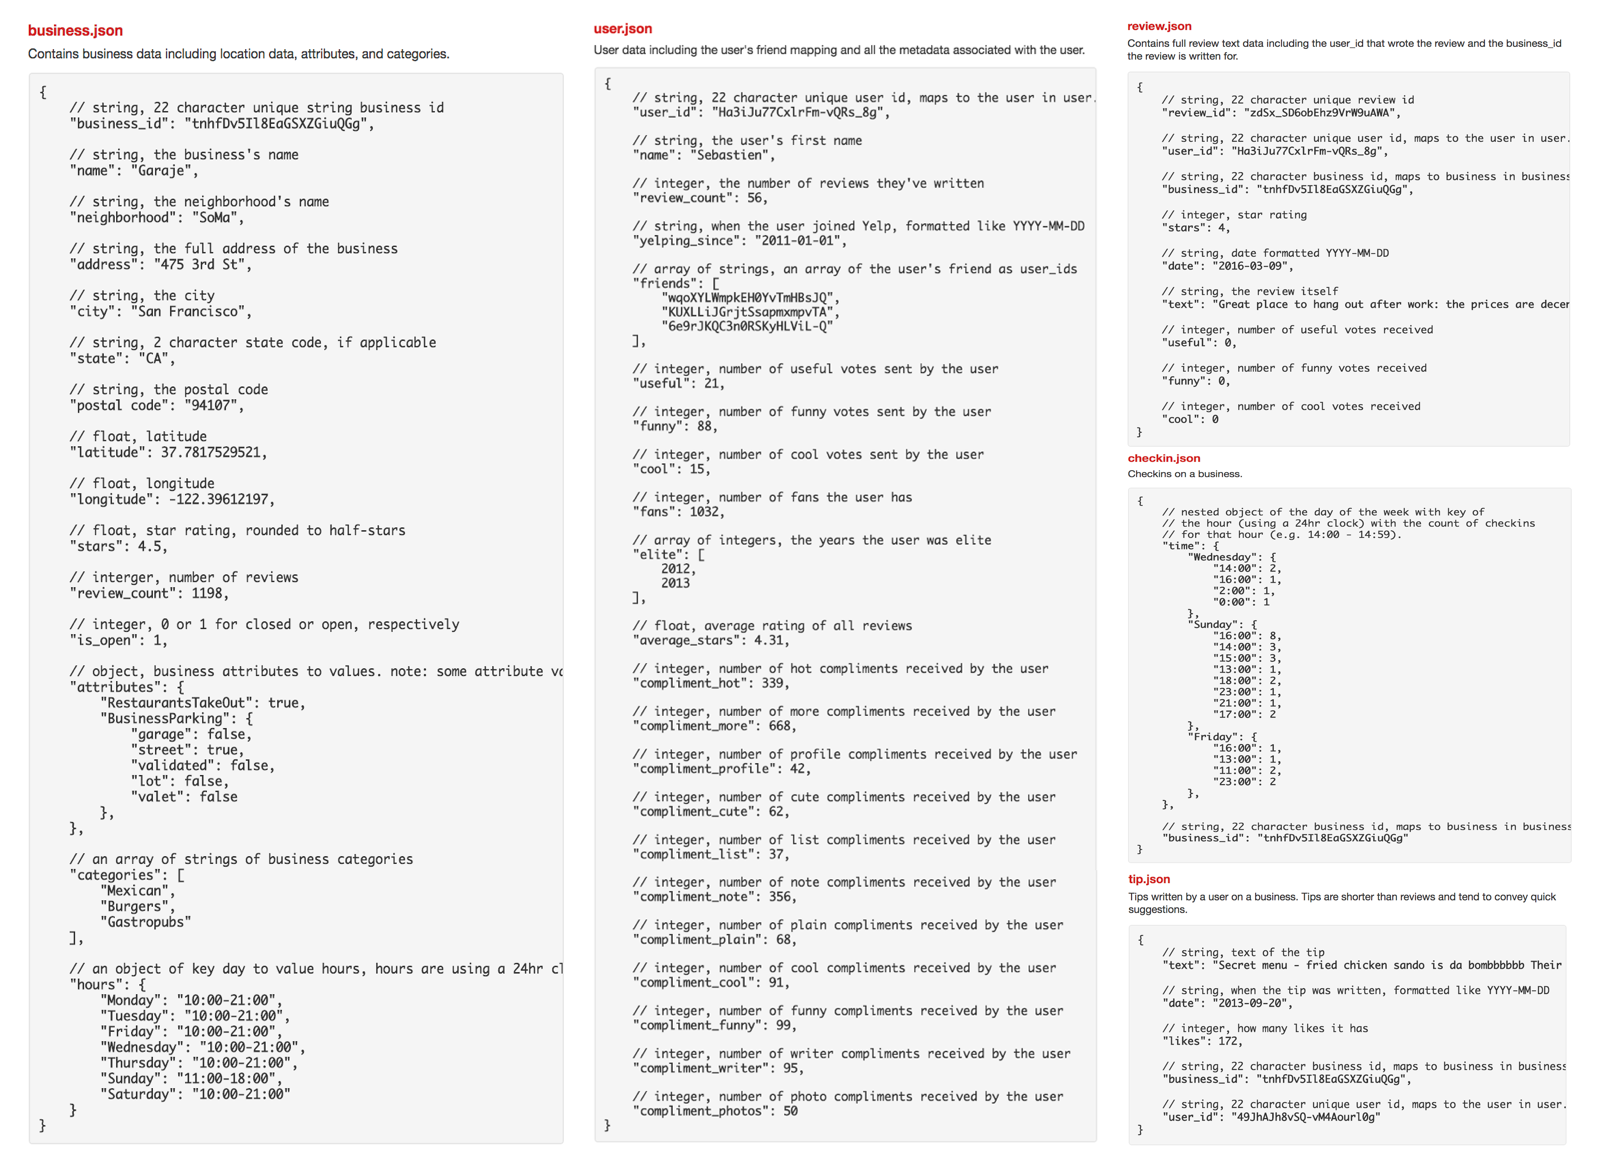

* **Convert to CSV files while unpacking nested dictionaries:** <br>
The raw json files are downloaded as they are ('business.json','user.json','review.json','tip.json','checkin.json'). Then a python script ('json_to_csv.py'), available at https://github.com/jingzhaomirror/Springboard_capstone_2/blob/master/json_to_csv.py), is used to convert all the raw json files to csv files of the same name. Nested json dictionaries are flatterned during this conversion and both parent and nested key, value pairs are extracted.

* **Cleanup:** <br>
All five csv files are imported as Pandas dataframes, inspected and cleaned up accordingly. 


* **More information on data wrangling:** <br>
https://github.com/jingzhaomirror/Springboard_capstone_2/blob/master/data_wrangling.ipynb

### 2.1 Data acquisition and conversion

In [ ]:
# run 'json_to_csv.py' script to convert all json files into csv files of the same name
# nested dictionaries is flatterned during the conversion and both parent and nested key, value pairs are extracted

%run -i 'json_to_csv.py' 'dataset/business.json'
%run -i 'json_to_csv.py' 'dataset/user.json'
%run -i 'json_to_csv.py' 'dataset/review.json'
%run -i 'json_to_csv.py' 'dataset/tip.json'
%run -i 'json_to_csv.py' 'dataset/checkin.json'

In [ ]:
import pandas as pd
import numpy as np

# import all five csv files as Pandas dataframe
business = pd.read_csv('dataset/business.csv')  # contains business data including location data, attributes and categories
user = pd.read_csv('dataset/user.csv') # contains users data including the user's friend mapping and all the metadata associated with the user
review = pd.read_csv('dataset/review.csv') # contains full review text data including the user_id that wrote the review and the business_id the review is written for
tip = pd.read_csv('dataset/tip.csv') # tips written by a user on a business, tips are shorter than reviews and tend to convey quick suggestions
checkin = pd.read_csv('dataset/checkin.csv') # checkins on a business

### 2.2 Cleanup

#### 2.2.1 dataframe 'business'
The 'business' dataframe contains a total of 188,593 businesses all over the world with a primary focus on US businesses. Business categories include a wide variaty of 1264 keywords, many of which are not restaurant-related, for instance, 'shopping', 'health & medical', 'automotive', etc. 

For this project (Yelp restaurant recommender), the scope is limited to US restaurants. Therefore, the 'business' dataframe is first filtered to US business only (138,757 businesses, reduced by 26%), then to restaurant-related business only (47,554 businesses, reduced by 66%).

In [ ]:
# filter to US business only by:

# 1. filter by postal_code following the American 5-digit zip code format
ziplen = business.postal_code.astype(str).apply(len) # drop entries where postal_code is not 5-digit from business
business = business[ziplen == 5]

# 2. filter by state abbreviation
list_of_states = ['AL','AK','AR','AS','AZ','CA','CO','CT','DC','DE','FL','FM','GA','GU','HI','IA','ID','IL','IN','KS','KY','LA','MA','MD','ME','MH','MI','MN','MO','MS','MT','NC','ND','NE','NH','NJ','NM','NV','NY','MP','OH','OK','OR','PA','PR','PW','RI','SC','SD','TN','TX','UT','VA','VI','VT','WA','WI','WV','WY']
business = business[business.state.isin(list_of_states)]

In [ ]:
# deal with missing city information
business.loc[58688,'city'] = 'Yuma' # add missing city info
business.loc[111036,'city'] = 'Raleigh' # add missing city info

# remove one entry with missing latitude information
business = business[business.latitude.notnull()]

In [ ]:
# remove business types other than restaurants

def rmv_non_restaurant_busi(df, yes=[], no=[]): 
    
    """
    remove businesses other than restaurants based on the information provided under business 'categories'
    ---
    input:
    1. df: dataframe to be cleaned up
    2. yes: additional list of strings for identifying restaurants
    3. no: additional list of strings for identifying non-restaurant busineses
    note: 'yes' and 'no' are optional, if provided, an union of the default set and the provided list will be computed and used. 
    ---
    output:
    cleaned up dataframe containing only restaurant-based businesses
    """

    yes = set(['fast food','sandwiches','caterers','deserts','burgers']).union(set(yes))
    no = set(['shopping','home services','beauty & spas','hair salons','health & medical', 'local services','automotive',
              'fitness & instruction','transportation','airlines','pets','active life','professional services','banks & credit unions'
             'insurance','financial services','education','public services & government','session photography','car rental',
             'photographers','churches','religious organizations','tours','doctors','massage','pharmacy','drugstores']).union(set(no))
    
    idx_to_drop = []
    for idx, row in df.iterrows():
        if row['categories'] is not np.nan: 
            entries = row['categories'].split(',')
            for entry in entries:
                entry = entry.strip().lower()
                if entry in yes: 
                    break
                if entry in no:
                    idx_to_drop.append(idx)
                    break
        elif row['attributes.HairSpecializesIn'] is not np.nan:  # if 'categories' is not available, use 'attributes' to filter
            idx_to_drop.append(idx) 
                    
    return df.drop(index=idx_to_drop)

business = rmv_non_restaurant_busi(business)

In [ ]:
business.reset_index(drop=True, inplace=True) # update index

#### 2.2.2 dataframe 'user'
The 'user' dataframe contains a total of 1,518,169 users, with only a few NaNs (0.03%) in the 'name' column and no NaNs in other columns. Since 'user_id' functions as the unique identifier for identifying users and cross-referencing to other dataframes, missing information in the 'name' column is not a problem.<br>
Action is taken to remove one outlier (value of 0.0) in the 'average_stars' column, as 'average_stars' should take any float number between 1.00 and 5.00.

In [ ]:
# remove the one entry having the average_stars of 0.0
user = user[user.average_stars != 0]
user.reset_index(inplace=True, drop=True)

#### 2.2.3 dataframe 'review'
The 'review' dataframe contains a total of 5,996,996 reviews. There are only two problematic entries with incorrect and missing information: <br>
1) one entry has a value of 0 in the 'stars' column, which should only take on discrete values of 1, 2, 3, 4 or 5. 
This entry is removed since the actual review in the 'text' column is also missing.<br>
2) one entry has values of -1 in the columns of 'useful' and 'cool'. Since these two columns should only take binary values of 0 or 1, the values have been updated <br>

In addition, the 'text' column containing the actual contents of the reviews has been updated to 'string' data type. The carriage-return '\r' is present in a few reviews, causing undesired creation of new rows when writing to and importing from csv files. Therefore, '\r' is replaced with '\n\n'.

In [ ]:
# remove the one entry with star rating of 0 under 'star' column and no actual review ('nan' under 'text' column)
review = review[review.stars != 0]

# correct the values under columns 'useful' and 'cool' for review_id 3445401 from -1 to 0, since values should be non-negative
review.loc[3445401, ['cool','useful']] = 0

# convert all values in the 'text' column to string type
review['text'] = review.text.astype(str)

# replace the '\r' with '\n\n' in a few reviews to avoid problems when writing to and importing from csv files
review.loc[3009218,'text']=repr(review.loc[3009218,'text']).replace('\r','\n\n')
review.loc[5507254,'text']=repr(review.loc[5507254,'text']).replace('\r','\n\n')

review.reset_index(inplace=True, drop=True) # update index

#### 2.2.4 dataframe 'tip'
The 'tip' dataframe contains a total of 1,185,348 tips, four (0.0003%) out of which having no actual tip contents and are removed. 

In [ ]:
# drop entries with 'NaN' under 'text' column
tip = tip[tip.text.notnull()]
tip.reset_index(inplace=True, drop=True)

#### 2.2.5 dataframe 'checkin'
The 'checkin' dataframe contains 157,075 checkin logs associated with 157,075 different businesses. Each entry represents the checkin information for one business, with the checkin counts for particular hours in the different days of the week. A column named 'total_count' is computed and introduced by adding up all checkins at all times. 

In [ ]:
# sort the columns by column names
ordered_names = sorted(checkin.columns)
checkin = checkin[ordered_names]
print(checkin.columns)

# add a new column named 'total_count' containing the sum of all checkins at all times (sum of all values under the nested columns with names starting with 'time.')
checkin['total_count'] = checkin.loc[:,'time.Fri-0':'time.Wed-9'].sum(axis=1).astype(int)

### 2.3 Cleaned datasets
The cleaned dataframes are saved as five separate csv files, 'business_clean.csv', 'user_clean.csv', 'review_clean.csv', 'tip_clean.csv' and 'checkin_clean.csv'.

In [ ]:
# output cleaned dataframes to csv files
business.to_csv(path_or_buf='business_clean.csv',index=False)
user.to_csv(path_or_buf='user_clean.csv',index=False)
review.to_csv(path_or_buf='review_clean.csv',index=False)
tip.to_csv(path_or_buf='tip_clean.csv',index=False)
checkin.to_csv(path_or_buf='checkin_clean.csv',index=False)

#### A short description of each dataframe is given as below:

---
* **'business':**<br>
('business' also contains columns resulting from unpacking nested dictionaries under the 'attributes' and 'hours' columns, those 'child' columns feature column names starting with either 'attributes.' or 'hours.'. Below is a summary of only the 'parent' columns) <br>
1) business_id: no NaN, no dulicates, all business_ids are of the same length of 22 characters, and are case-sensitive.<br>
2) name: no NaN.<br>
3) address: there are 1.9% NaNs, but it's ok since postal_code and coordinates are used mostly instead of address<br>
4) postal_code: no NaN, following the American 5-digit zipcode format.<br>
5) city, 6) state, 7) latitude and 8) longitude: no NaN.<br>
9) stars: no NaN, all star ratings take values from 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5 and 5.0.<br>
10) review_count: no NaN, review counts range between 3 and 7968.<br>
11) is_open: no NaN, integer taking values of 0 or 1 for closed (27.3%) or open (72.7%), respectively<br>
12) neighborhood: significant NaNs (66.7%), the top 5 neighborhoods are 'Westside','Southeast','Spring Valley','The Strip','downtown'. The neighborhood information will not be used as location information. Instead, it will be treated as one of the business features for NLP analysis.<br>
13) attributes: some NaNs (3.9%), all with subattributes shown under column names featuring 'attributes.'<br>
    -most subattributes are categorical with either True or False binary entries or a few categorical values;<br>
    -six subattributes (e.g. 'attributes.businessParking') still contain nested dictionaries;<br>
14) categories: a few NaNs (0.9%), string values contains comma separated phrases describing restaurant cuisines or styles, e.g. 'burger'.<br>
15) hours: many NaNs (26.8%), all with subfeatures shown under columns names featuring 'hours.' <br>
    -all subfeatures are day of the week from 'Monday' to 'Sunday', with string values indicating the operating hours<br>

---
* **'user':**<br>
1) user_id: no NaN, no duplicates, similar to business_id, all user_ids are of the same length of 22 characters, and are case-sensitive.<br>
2) name: a few NaNs (0.03%). User_id will be used instead of name in all cases.<br>
3) elite: no NaNs, contains a list of the years the user was an elite member (very active Yelp users with frequent activities and many insightful reviews & tips). Most users (95.6%) has 'None' as the value.<br>
4) yelping_since: no NaN, string formatted as YYYY-MM-DD, ranging between 2004-10-12 and 2018-07-02, indicating the date user joined Yelp.<br>
5) review_count: no NaN, integer value indicating the number of reviews the user has written, value ranges between 0 and 12723.<br>
6) average_stars: no NaN, takes any float number between 1.00 and 5.00.<br>
7) useful: no NaN, integer indicates the number of useful votes sent by the user. Value ranges between 0 and 258479,with 0 being the most common value.<br>
8) funny:  no NaN, integer indicates the number of useful votes sent by the user. Value ranges between 0 and 242120,with 0 being the most common value.<br>
9) cool: no NaN, integer indicates the number of useful votes sent by the user. Value ranges between 0 and 255909,with 0 being the most common value.<br>
10) fans: no NaN, integer indiates the number of fans the user has. Value ranges between 0 and 8665, with 0 being the most common value. <br>
11) compliment_*: no NaN, all integers indicating the number of various types of compliments received by the users.<br>

---
* **'review':**<br> 
1) review_id: no NaN, no duplicates, similar to user_id and business_id, all review_ids are of the same length of 22 characters, and are case-sensitive.<br>
2) user_id: no NaN, all of the same length of 22 characters, case-sensitive, corresponding to the user_id in dataframe 'user'.<br>
3) business_id: no NaN, all of the same length of 22 characters, case-sensitive, corresponding to the business_id in dataframe 'business'.<br>
4) stars: no NaN, integer indicating the star rating, takes discrete values of 1, 2, 3, 4 and 5<br>
5) text: no NaN and no empty entries, strings of the actual reviews, with length ranging from 1 to 5000.<br>
5) date: no NaN, string of length 10 formatted as YYYY-MM-DD, dates ranges from 2004-10-12 to 2018-07-02.<br>
6) useful: no NaN, integer, the number of useful votes the review received, values range from 0 to 1234.<br>
7) funny: no NaN, integer, the number of useful votes the review received, values range from 0 to 505.<br>
8) cool: no NaN, integer, the number of useful votes the review received, values range from 0 to 991.<br>

---
* **'tip':** <br>
1) user_id: no NaN, all of the same length of 22 characters, case-sensitive, corresponding to the user_id in dataframe 'user'.<br>
2) business_id: no NaN, all of the same length of 22 characters, case-sensitive, corresponding to the business_id in dataframe 'business'.<br>
3) text: no NaN and no empty entries, strings of the actual tips, with length ranging from 1 to 500.<br>
4) date: no NaN, string value of length 10 formatted as YYYY-MM-DD, dates ranges from 2009-04-15 to 2018-07-02.<br>
5) likes: no NaN, integer value indicating the number of likes the tip received, value ranges from 0 to 15.<br>

---
* **'checkin':** <br>
('checkin' also contains columns resulting from unpacking nested dictionaries under column 'time', those nested columns feature column names starting with 'time.'. Below is a summary of only the parent columns)<br>
1) business_id: no NaN, no duplicates, all business_ids are of the same length of 22 characters, and are case-sensitive.<br>
2) time: no NaN, parent columns with nested dictionaries containing checkin counts (value) under all times (key).<br>
3) total_count: no NaN, integer indicating the sum of all checkins at all times for the business_id, values range from 1 to 138477.<br>

## 3. Exploratory data analysis

## 4. Conclusion